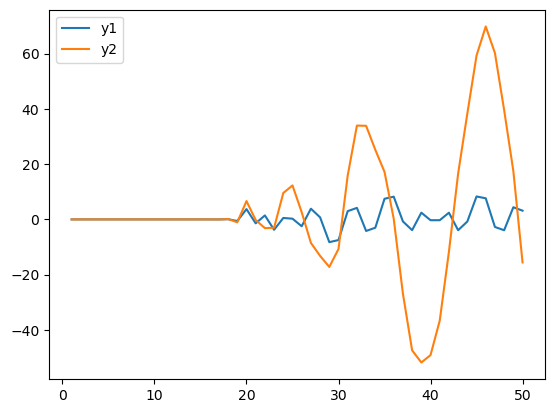

PyObject <matplotlib.legend.Legend object at 0x2975a1ea0>

In [12]:
# using PyPlot
# initialization
m = 1.0
l = 1.0
g = 9.8


# first pendulum
theta1 = pi/2
x1 = l*sin(theta1)
y1 = -l*cos(theta1)

# second pendulum
theta2 = pi/2
x2 = x1 + l*sin(theta2)
y2 = y1 - l*cos(theta2)

# initial velocities
v1 = 0.0
v2 = 0.0

# KE = 0.5mv^2
# PE = mgh
# L = KE - PE

# lagrangian
# I = m*l^2/12;
# rotational kinetic energy
# L = (m*(v1^2 + v2^2) + I*(theta1^2 + theta2^2))/2 - m*g*(y1 + y2); 

# v^2 = (dx/dt)^2 + (dy/dt)^2

time_limit = 50;
v1 = zeros(2,time_limit);#Vector{Vector{Int64}};
v2 = zeros(2,time_limit);
v1[:,1] = [0.0; 0.0];
v2[:,1] = [0.0; 0.0];
y1s = zeros(time_limit);
y2s = zeros(time_limit);

for k = 1:time_limit
    x1 = v1[1,k] + x1;
    y1 = v1[2,k] + y1;
    x2 = v1[1,k] + v2[1,k] + x2;
    y2 = v1[2,k] + v2[2,k] + y2;
    y1s[k] = y1;
    y2s[k] = y2;
    theta1 = atan(y1/x1);
    theta2 = atan(y2/x2);
    if k != time_limit
        v1[:,k+1] = [0.0; (-g*sin(theta1) + v1[2,k])];
        v2[:,k+1] = [0.0; (-g*sin(theta2) + v2[2,k] + v1[2,k])];
    end
end

plot(1:time_limit, y1s,  label="y1");
plot(1:time_limit, y2s, label="y2")
legend()
# lol this does not work

In [ ]:
function explicit_rk4(f::Function, ẏ::Vector, T_final::Real, N::Int)

    #initialize
    y = zeros(length(ẏ), N + 1)

    # time range
    t = 0:T_final:N+1
    t = range(0, T_final, length = N + 1)
    Δt = t[2] - t[1]

    y[:, 1] = ẏ

    for i in 1:N
        k1 = f(t[i], y[:, i])
        k2 = f(t[i] .+ Δt/2, y[:, i] .+ Δt/2 .* k1)
        k3 = f(t[i] .+ Δt/2, y[:, i] .+ Δt/2 .* k2)
        k4 = f(t[i] .+ Δt, y[:, i] .+ Δt .* k3)
        y[:, i + 1] = y[:, i] + Δt/6 .* (k1 + 2 .* k2 + 2 .* k3 + k4)
    end

    return t, y
end

In [ ]:
expl_rk4_t, expl_rk4_y = explicit_rk4(
        # function f declared as an in-line function
        (t, y) -> [y[2]; -y[1]],
        
        # value of ẏ
        [1; 0],
        
        # value of T_final
        4 * π,
        
        # value of N
        100,

    );